## NHS Diagnostic Analysis using Python

I’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will requires me to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

# 

### Approach Plan

In [ ]:
# The NHS has tasked us with analyzing their appointment data to provide insights into the utilization of healthcare services. 
# With this analysis, the NHS aims to improve capacity planning, staff allocation, and service delivery by understanding key aspects such as appointment modes, attendance patterns, and patient engagement.
# The primary objective is to set up an organized environment for the project and plan an analytic approach to answer specific business questions. 

# We will:
	# 1.	Review data files and understand their structure.
	# 2.	Document a plan to analyze and answer key questions using the provided data.
	# 3.	Outline data processing, cleaning, and visualization steps.

# My approach will consist of 5 steps:
    # 1. Setting Up the Environment: making sure each file is placed in a working directory in Jupyter notebook as well as setting the Python environment by importing all necessary libraries. 

    # 2. Exploring the contents of each files: Understanding the metadata and reviewing each file to see if there any potential issues.

    # 3. Planning the analysis: a few questions arise when reviewing the data such as: 
          # 3.1. How does the distribution of appointment modes (e.g., face-to-face, telephone) vary over time?
		  # 3.2. Are there patterns in attendance based on appointment settings and regions?
		  # 3.3. What impact does the time between booking and appointment have on attendance?
		  # 3.4. How do national categories and context types correlate with attendance patterns and appointment modes?

    # 4. Documenting the Analytical Workflow: to maintain a clean workflow, I will use the comments already embedded in each cell of this notebook to make sure everything is well documented. 


    # 5. Backup Strategy: mainly to preven data loss, at the end of each session, I will save the work in this notebook.


# 

### Workstation Preparation

In [6]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
print(ad.head(10))

  sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   
5                   00L                 E38000130   
6                   00L                 E38000130   
7                   00L                 E38000130   
8                   00L                 E38000130   
9                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and Nort

In [8]:
# Determine whether there are missing values.
print("\nMissing Values:\n")
print(ad.isnull().sum())


Missing Values:

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64


In [9]:
# Determine the metadata of the data set.
print("\nMetadata Information:\n")
print(ad.info())


Metadata Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None


In [10]:
# Determine the descriptive statistics of the data set.

#1. How many locations are there in the data set?
location_count = ad['sub_icb_location_name'].nunique()
print(location_count)

106


In [11]:
#2. What are the five locations with the highest number of appointments?
top_five_locations = ad.groupby('sub_icb_location_name')['count_of_appointments'].sum().sort_values(ascending=False).head(5)
print('\nFive locations with the highest number of appointments:\n', top_five_locations)


Five locations with the highest number of appointments:
 sub_icb_location_name
NHS North West London ICB - W2U3Z              6976986
NHS North East London ICB - A3A8R              5341883
NHS Kent and Medway ICB - 91Q                  5209641
NHS Hampshire and Isle Of Wight ICB - D9Y0V    4712737
NHS South East London ICB - 72Q                4360079
Name: count_of_appointments, dtype: int64


In [12]:
#4. Are there any comments regarding data quality or descriptive statistics worth noting for each of the data sets?
print("\nDescriptive Statistics:\n", ad.describe())


Descriptive Statistics:
        count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000


In [13]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
print(ar.head(5))

  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971  


In [14]:
# Determine whether there are missing values.
print("\nMissing Values:\n")
print(ar.isnull().sum())


Missing Values:

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64


In [15]:
# Determine the metadata of the data set.
print("\nMetadata Information:\n")
print(ar.info())


Metadata Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None


In [16]:
# APPOINTMENT STATUSES COUNT

appointment_status_count = ar['appointment_status'].nunique()
print("Number of unique appointment statuses: ", appointment_status_count)

Number of unique appointment statuses:  3


In [17]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
print(nc.head(5))

  appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2             

In [18]:
# Determine whether there are missing values.
print("\nMissing Values:\n")
print(nc.isnull().sum())


Missing Values:

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64


In [19]:
# Determine the metadata of the data set.
print("\nMetadata Information:\n")
print(nc.info())


Metadata Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None


In [20]:
#3. How many service settings, context types, national categories, and appointment statuses are there?

service_settings_count = nc['service_setting'].nunique()
context_types_count = nc['context_type'].nunique()
national_categories_count = nc['national_category'].nunique() 

print("\nNumber of unique service settings: ", service_settings_count)
print("Number of unique context types: ", context_types_count)
print("Number of unique national categories: ", national_categories_count)


Number of unique service settings:  5
Number of unique context types:  3
Number of unique national categories:  18


### Data set Exploration

**Question 1:** How many locations are there in the data set?

In [21]:
# Determine the number of locations.
location_count = ad['sub_icb_location_name'].nunique()
print(location_count)

106


**Question 2:** What are the five locations with the highest number of appointments?



In [22]:
# Determine the top five locations based on record count.
top_five_locations = ad.groupby('sub_icb_location_name')['count_of_appointments'].sum().sort_values(ascending=False).head(5)
print('\nFive locations with the highest number of appointments:\n', top_five_locations)


Five locations with the highest number of appointments:
 sub_icb_location_name
NHS North West London ICB - W2U3Z              6976986
NHS North East London ICB - A3A8R              5341883
NHS Kent and Medway ICB - 91Q                  5209641
NHS Hampshire and Isle Of Wight ICB - D9Y0V    4712737
NHS South East London ICB - 72Q                4360079
Name: count_of_appointments, dtype: int64


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [23]:
# Determine the number of service settings.
service_settings_count = nc['service_setting'].nunique()
print("\nNumber of unique service settings: ", service_settings_count)


Number of unique service settings:  5


In [24]:
# Determine the number of context types.
context_types_count = nc['context_type'].nunique()
print("Number of unique context types: ", context_types_count)

Number of unique context types:  3


In [25]:
# Determine the number of national categories.
national_categories_count = nc['national_category'].nunique()
print("Number of unique national categories: ", national_categories_count)

Number of unique national categories:  18


In [26]:
# Determine the number of appointment statuses.
appointment_status_count = ar['appointment_status'].nunique()
print("Number of unique appointment statuses: ", appointment_status_count)

Number of unique appointment statuses:  3


### Specific data exploration 

**Question 1:** Between what dates were appointments scheduled? 

In [8]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
import pandas as pd
import numpy as np

ad = pd.read_csv('actual_duration.csv')

ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [9]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc = pd.read_excel('national_categories.xlsx')

nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [10]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format="%d-%b-%y", dayfirst=True)

# View the DateFrame.
print(ad.head())

  sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0       2021-12-01           31-60 Minutes                    364  
1       2021-12-01           21-30 Minutes                    619  
2       

In [22]:
# Change the date format of ar['appointment_date'].
ar = pd.read_csv('appointments_regional.csv')

ar['appointment_month'] = pd.to_datetime(ar['appointment_month']).dt.to_period('M')

# View the DataFrame to confirm the change
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [40]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.

min_date_ad = ad['appointment_date'].min()
max_date_ad = ad['appointment_date'].max()
print(f"Appointments in ad DataFrame are scheduled between {min_date_ad} and {max_date_ad}.")

Appointments in ad DataFrame are scheduled between 2021-12-01 00:00:00 and 2022-06-30 00:00:00.


In [41]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.

min_date_nc = nc['appointment_date'].min()
max_date_nc = nc['appointment_date'].max()
print(f"Appointments in nc DataFrame are scheduled between {min_date_nc} and {max_date_nc}.")

Appointments in nc DataFrame are scheduled between 2021-08-01 00:00:00 and 2022-06-30 00:00:00.


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [24]:
# Filter the data for NHS North West London ICB from 1 January to 1 June 2022
filtered_nc = nc[(nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z') & 
                 (nc['appointment_date'] >= '2022-01-01') & 
                 (nc['appointment_date'] <= '2022-06-01')]

# Count the occurrences of each service setting
service_setting_counts = filtered_nc['service_setting'].value_counts()

# Display all service settings with their counts
print(service_setting_counts)

# Get the count for General Practice specifically
general_practice_count = service_setting_counts.get('General Practice', 0)
print(f"\nGeneral Practice count: {general_practice_count}")

service_setting
General Practice             2104
Other                        1318
Primary Care Network         1272
Extended Access Provision    1090
Unmapped                      152
Name: count, dtype: int64

General Practice count: 2104


**Question 3:** Which month had the highest number of appointments?

In [25]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
ad['appointment_month'] = ad['appointment_date'].dt.to_period('M')
monthly_appointments = ad.groupby('appointment_month')['count_of_appointments'].sum().sort_values(ascending=False)
print("\nMonth with the highest number of appointments:\n", monthly_appointments.head(1))


Month with the highest number of appointments:
 appointment_month
2022-03    27170002
Freq: M, Name: count_of_appointments, dtype: int64


**Question 4:** What was the total number of records per month?

In [34]:
# Total number of records per month.
#ad
total_records_per_month_ad = ad.groupby(ad['appointment_date'].dt.to_period('M'))['count_of_appointments'].count()
print("\nTotal number of records per month in actual_duration (ad):\n", total_records_per_month_ad)

#ar
total_records_per_month_ar = ar.groupby('appointment_month')['count_of_appointments'].count()
print("\nTotal number of records per month in appointments_regional (ar):\n", total_records_per_month_ar)

#nc
# Group by 'appointment_month' and sum the 'count_of_appointments'
total_records_per_month_nc = nc.groupby('appointment_month')['count_of_appointments'].count()
print("\nTotal number of records per month in national_categories (nc):\n", total_records_per_month_nc)


Total number of records per month in actual_duration (ad):
 appointment_date
2021-12    19507
2022-01    19643
2022-02    18974
2022-03    21236
2022-04    19078
2022-05    20128
2022-06    19227
Freq: M, Name: count_of_appointments, dtype: int64

Total number of records per month in appointments_regional (ar):
 appointment_month
2020-01    20889
2020-02    20689
2020-03    21350
2020-04    19124
2020-05    18338
2020-06    18844
2020-07    19502
2020-08    19247
2020-09    20043
2020-10    20122
2020-11    19675
2020-12    19394
2021-01    19319
2021-02    18949
2021-03    19369
2021-04    19452
2021-05    19384
2021-06    19814
2021-07    19899
2021-08    19786
2021-09    20441
2021-10    20562
2021-11    20766
2021-12    20393
2022-01    20225
2022-02    20133
2022-03    20532
2022-04    20073
2022-05    20276
2022-06    20231
Freq: M, Name: count_of_appointments, dtype: int64

Total number of records per month in national_categories (nc):
 appointment_month
2021-08    69999
2021-0

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [2]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [3]:
# Load the dataset
national_categories_df = pd.read_excel('national_categories.xlsx')

# Change the data type of the appointment month to string to allow for easier plotting.
national_categories_df['appointment_month'] = pd.to_datetime(national_categories_df['appointment_month'])

In [4]:
# Aggregate on monthly level and determine the sum of records per month.
monthly_appointments = national_categories_df.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# View output.
monthly_appointments.head()

,appointment_month,count_of_appointments
0,2021-08-01,23852171
1,2021-09-01,28522501
2,2021-10-01,30303834
3,2021-11-01,30405070
4,2021-12-01,25140776


**Service settings:**

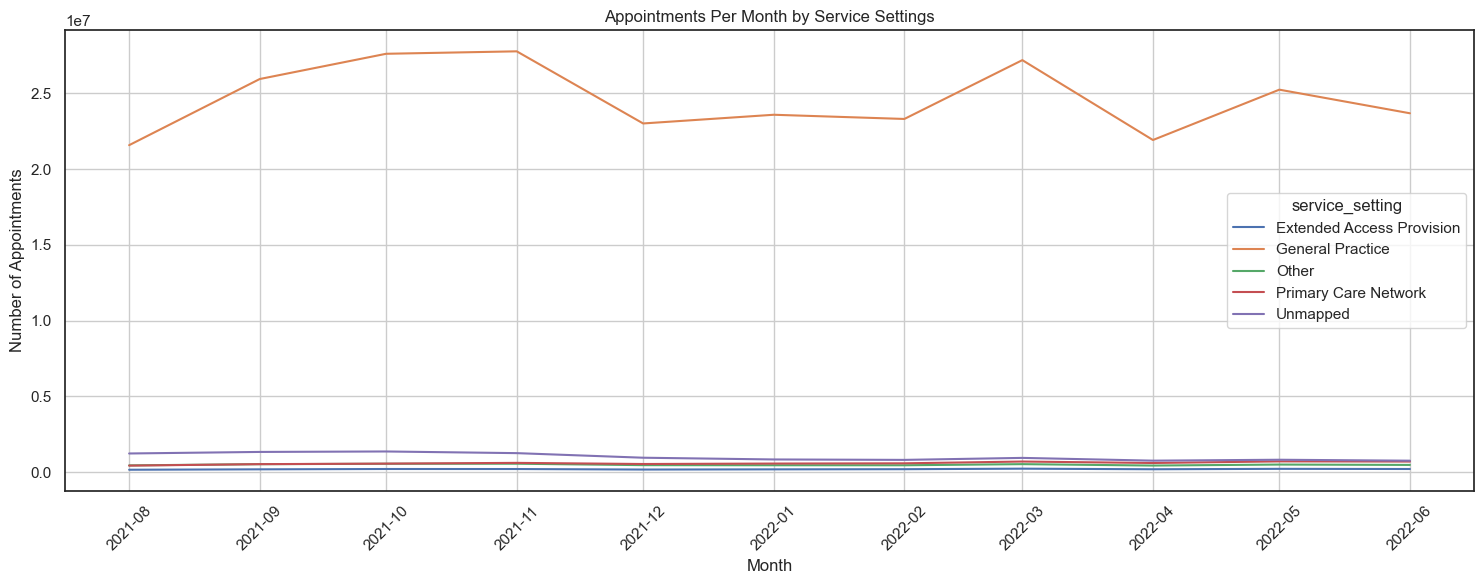

In [6]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
service_settings_monthly = national_categories_df.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(15, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=service_settings_monthly)
plt.title('Appointments Per Month by Service Settings')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.savefig('appointments_per_month_service_settings.png', dpi=300)

**Context types:**

In [7]:
# Create a separate data set that can be used in future weeks. 
# Create a separate dataset for context types
context_types_monthly = national_categories_df.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# View output
context_types_monthly.head()

,appointment_month,context_type,count_of_appointments
0,2021-08-01,Care Related Encounter,20255235
1,2021-08-01,Inconsistent Mapping,2363093
2,2021-08-01,Unmapped,1233843
3,2021-09-01,Care Related Encounter,24404251
4,2021-09-01,Inconsistent Mapping,2782135


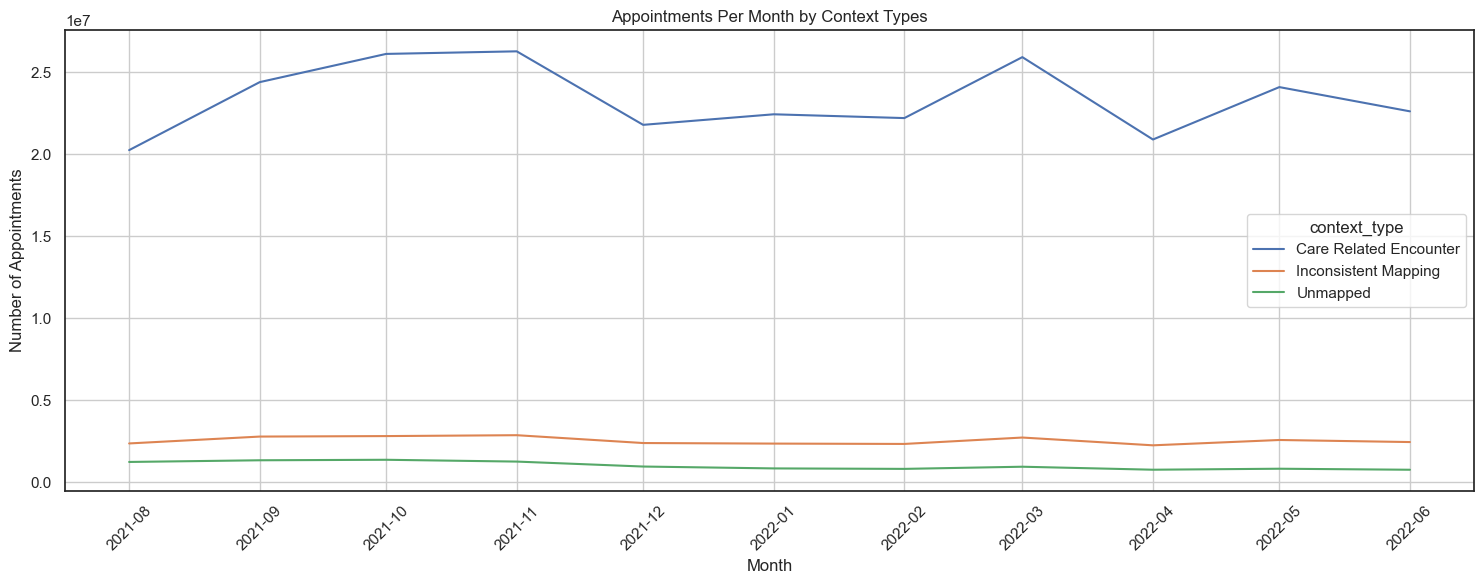

In [21]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
plt.figure(figsize=(15, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type', data=context_types_monthly)
plt.title('Appointments Per Month by Context Types')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('appointments_per_month_context_types.png', dpi=300)
plt.show()

**National categories:**

In [10]:
# Create a separate data set that can be used in future weeks. 
# Create a separate dataset for national categories
national_categories_monthly = national_categories_df.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

# View output
national_categories_monthly.head()

,appointment_month,national_category,count_of_appointments
0,2021-08-01,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08-01,Care Home Visit,47583
2,2021-08-01,Clinical Triage,3704207
3,2021-08-01,General Consultation Acute,4280920
4,2021-08-01,General Consultation Routine,7756045


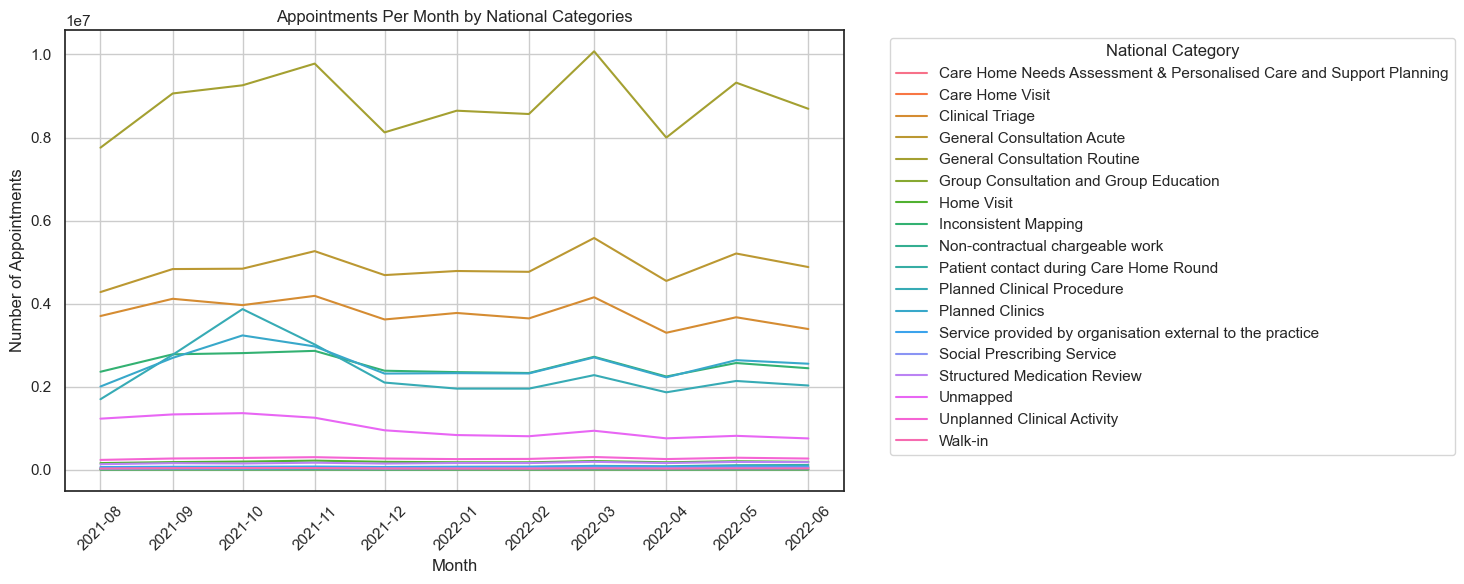

In [20]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
plt.figure(figsize=(15, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', data=national_categories_monthly)

# Place the legend outside the plot
plt.legend(title='National Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Appointments Per Month by National Categories')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('appointments_per_month_by_national_Categories.png', dpi=300)
plt.show()

### Objective 2
Four visualisations that indicate the number of appointments for service setting per season. The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

In [15]:
# To map months to seasons I wrote a function
def assign_season(month):
    if month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'
    else:
        return 'Spring'

# Apply the function to create a season column
national_categories_df['season'] = national_categories_df['appointment_month'].dt.month.apply(assign_season)

In [16]:
# Group by season and service_set, then aggregate the appointments
seasonal_service_settings = national_categories_df.groupby(['season', 'service_setting'])['count_of_appointments'].sum().reset_index()

seasonal_service_settings.head()

,season,service_setting,count_of_appointments
0,Autumn,Extended Access Provision,605022
1,Autumn,General Practice,81314881
2,Autumn,Other,1642445
3,Autumn,Primary Care Network,1709790
4,Autumn,Unmapped,3959267


**Summer (June to August 2021):**

In [17]:
# Create a separate data set that can be used in future weeks. 
# Filter the data for the available range in August 2021
summer_data = national_categories_df[(national_categories_df['appointment_date'] >= '2021-06-01') & (national_categories_df['appointment_date'] <= '2021-08-31')]

# View output.
summer_data.head(5)

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,season
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08-01,Summer
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08-01,Summer
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08-01,Summer
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08-01,Summer
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08-01,Summer


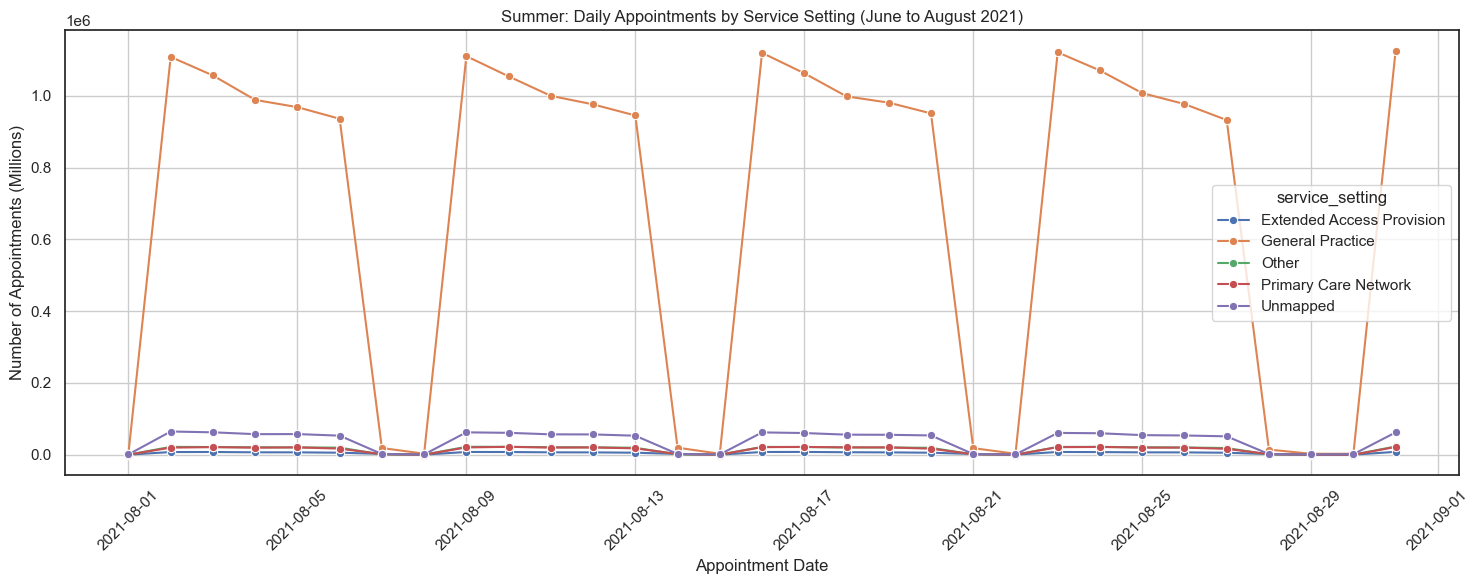

In [19]:
# Look at June to August 2021 in more detail to allow a closer look.
# Create a lineplot.
summer_service_setting = summer_data.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=summer_service_setting, marker='o')
plt.title('Summer: Daily Appointments by Service Setting (June to August 2021)')
plt.xlabel('Appointment Date')
plt.ylabel('Number of Appointments (Millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('summer_appointments.png', dpi=300)
plt.show()

**Autumn (September to November 2021):**

In [22]:
autumn_data = national_categories_df[(national_categories_df['appointment_date'] >= '2021-09-01') & (national_categories_df['appointment_date'] <= '2021-11-30')]

autumn_data.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,season
636,2021-09-01,E54000050,NHS North East and North Cumbria ICB - 00L,Unmapped,Unmapped,Unmapped,147,2021-09-01,Autumn
637,2021-09-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Structured Medication Review,4,2021-09-01,Autumn
638,2021-09-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinics,45,2021-09-01,Autumn
639,2021-09-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinical Procedure,8,2021-09-01,Autumn
640,2021-09-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,1,2021-09-01,Autumn


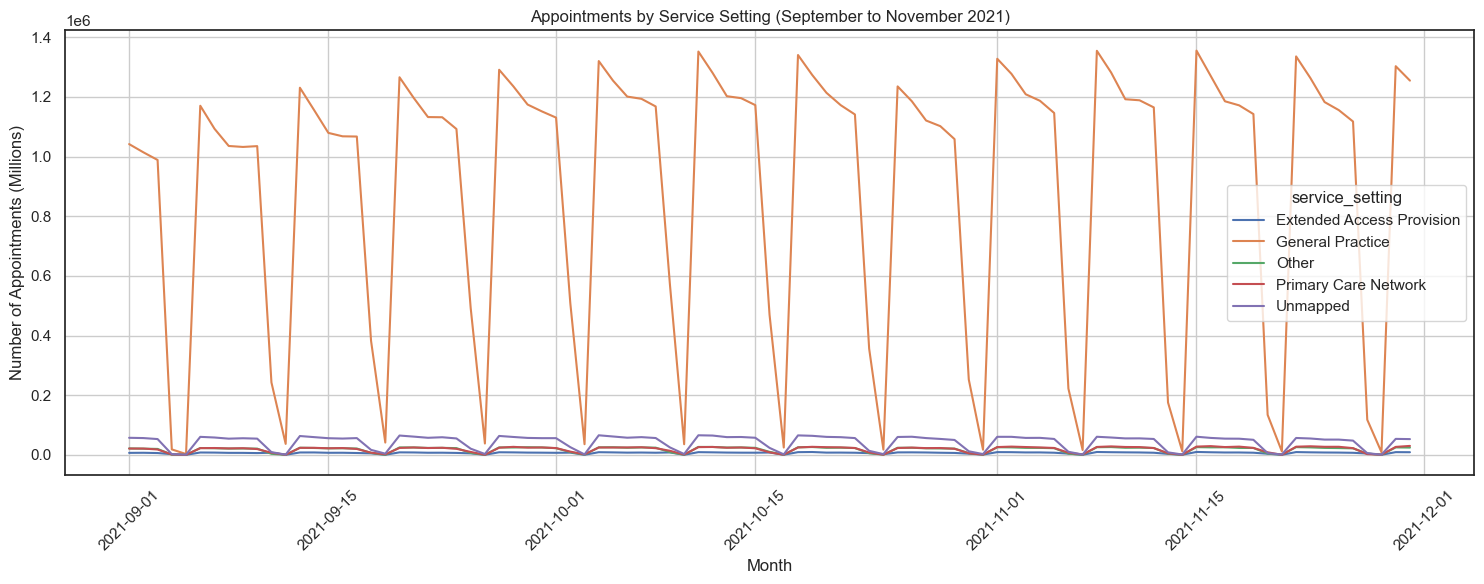

In [23]:
# Look at September to November 2021 in more detail to allow a closer look.
# Create a lineplot.
autumn_service_setting = autumn_data.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=autumn_service_setting)
plt.title('Appointments by Service Setting (September to November 2021)')
plt.xlabel('Month')
plt.ylabel('Number of Appointments (Millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('fall_appointments.png', dpi=300)
plt.show()

**Winter (December to February 2022):**

In [24]:
winter_data = national_categories_df[(national_categories_df['appointment_date'] >= '2021-12-01') & (national_categories_df['appointment_date'] <= '2022-02-28')]

winter_data.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,season
2634,2021-12-01,E54000050,NHS North East and North Cumbria ICB - 00L,Unmapped,Unmapped,Unmapped,198,2021-12-01,Winter
2635,2021-12-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Structured Medication Review,5,2021-12-01,Winter
2636,2021-12-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinics,52,2021-12-01,Winter
2637,2021-12-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinical Procedure,27,2021-12-01,Winter
2638,2021-12-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,30,2021-12-01,Winter


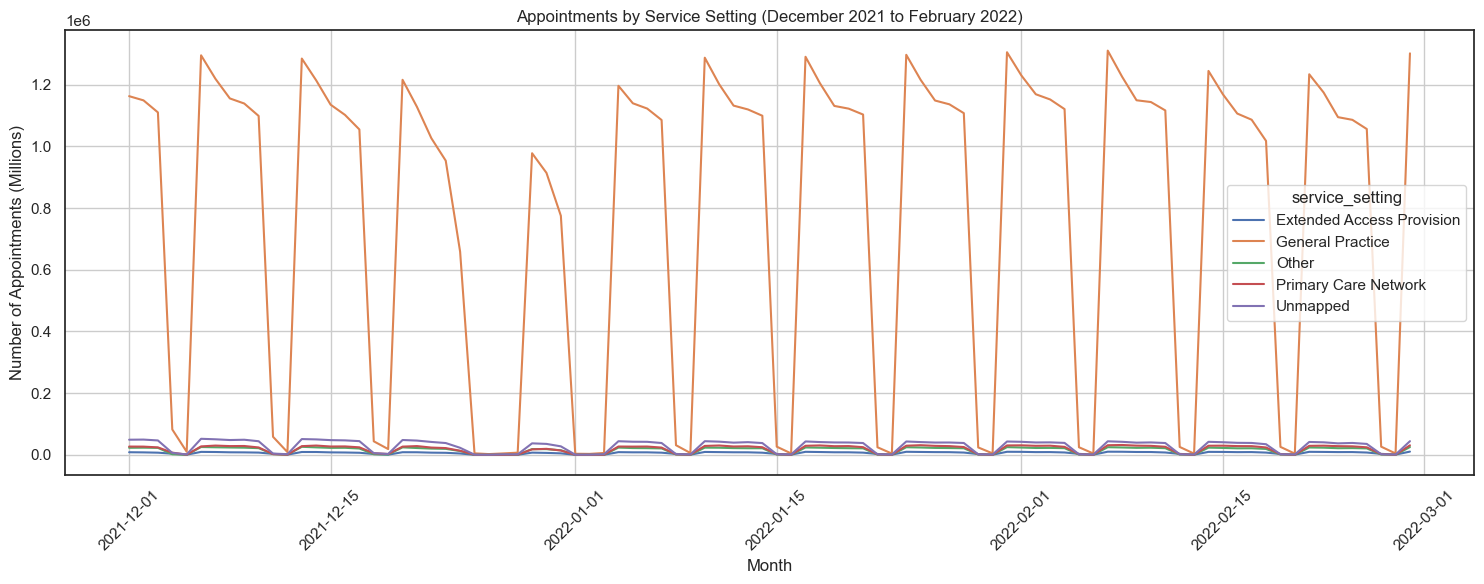

In [25]:
# Look at December to February 2022 in more detail to allow a closer look.
# Create a lineplot.
winter_service_setting = winter_data.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=winter_service_setting)
plt.title('Appointments by Service Setting (December 2021 to February 2022)')
plt.xlabel('Month')
plt.ylabel('Number of Appointments (Millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('winter_appointments.png', dpi=300)
plt.show()

**Spring (March to May 2022):**

In [26]:
spring_data = national_categories_df[(national_categories_df['appointment_month'] >= '2022-03-01') & (national_categories_df['appointment_month'] <= '2022-05-31')]

spring_data.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,season
4454,2022-03-01,E54000050,NHS North East and North Cumbria ICB - 00L,Unmapped,Unmapped,Unmapped,156,2022-03-01,Spring
4455,2022-03-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Inconsistent Mapping,Inconsistent Mapping,7,2022-03-01,Spring
4456,2022-03-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Structured Medication Review,19,2022-03-01,Spring
4457,2022-03-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Social Prescribing Service,15,2022-03-01,Spring
4458,2022-03-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinics,83,2022-03-01,Spring


In [27]:
spring_service_setting = spring_data.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

spring_service_setting.head()

,appointment_date,service_setting,count_of_appointments
0,2022-03-01,Extended Access Provision,10082
1,2022-03-01,General Practice,1229045
2,2022-03-01,Other,23986
3,2022-03-01,Primary Care Network,32070
4,2022-03-01,Unmapped,42682


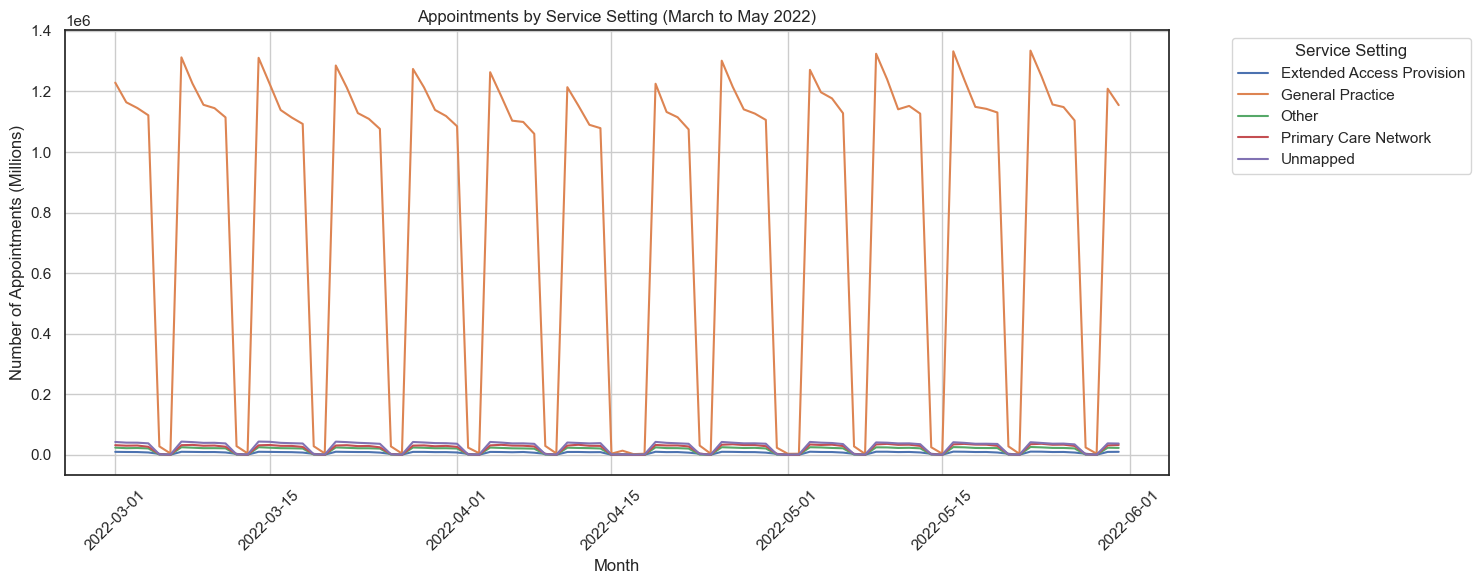

In [28]:
# Look at March to May 2022 in more detail to allow a closer look.
# Create a lineplot
plt.figure(figsize=(15, 6))
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=spring_service_setting)

#Place the legnd outside of the plot 
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Appointments by Service Setting (March to May 2022)')
plt.xlabel('Month')
plt.ylabel('Number of Appointments (Millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('spring_appointments.png', dpi=300)
plt.show()

### Tweets analysis from Twitter with hashtags related to healthcare in the UK.

In [30]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [31]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1169,1567583004209332227,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…,"{'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
1170,1567582945342267393,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...","{'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,1,False,False,en
1171,1567582936014241792,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...","{'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices'

In [32]:
# Explore the metadata.
print(tweets.columns)

Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')


In [33]:
# Explore the data set.
print(tweets.describe)
print(tweets.info())

<bound method NDFrame.describe of                  tweet_id  \
0     1567629223795527681   
1     1567582846612553728   
2     1567582787070304256   
3     1567582767625428992   
4     1567582720460570625   
...                   ...   
1169  1567583004209332227   
1170  1567582945342267393   
1171  1567582936014241792   
1172  1567582892892782592   
1173  1567582846847533058   

                                                                                                                                                                                              tweet_full_text  \
0     As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                                 RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hirin

In [34]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.
print(tweets['tweet_retweet_count'].value_counts())
print(tweets['tweet_favorited'].value_counts())

# It’s worth focusing on tweets with higher retweet counts to understand which messages are engaging and being shared by users.
# There is no data showing any tweets tweets being favorited, this columnd can be excluded from this analysis.

tweet_retweet_count
0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: count, dtype: int64
tweet_favorited
False    1174
Name: count, dtype: int64


In [35]:
# Create a new DataFrame containing only the text.
tweets_text = tweets[['tweet_full_text']]

# View the DataFrame.
tweets_text.head(5)

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


In [36]:
# Loop through the messages, and create a list of values containing the # symbol.
import re 

tags_a = []

pattern = r"#\w+"

for y in [re.findall(pattern, x) for x in tweets['tweet_full_text'].values]:
    for z in y:
        # Change to lowercase
        tags_a.append(z.lower())

In [37]:
# Display the first 30 records.
tags_s = pd.Series(tags_a).value_counts()

print(tags_s.head(30))

#healthcare                 844
#health                      88
#ai                          47
#medicine                    42
#job                         38
#medical                     35
#strategy                    31
#digitalhealth               31
#pharmaceutical              28
#medtwitter                  27
#biotech                     25
#pharma                      25
#competitiveintelligence     25
#marketing                   25
#meded                       24
#telehealth                  22
#hiring                      21
#covid                       21
#tipsfornewdocs              21
#healthtech                  18
#machinelearning             18
#technology                  18
#vaccine                     18
#medicare                    17
#news                        17
#womeninmedicine             16
#competitivemarketing        16
#coronavirus                 16
#tech                        15
#wellness                    15
Name: count, dtype: int64


In [38]:
# Convert the series to a DataFrame in preparation for visualisation.
tags_df = tags_s.reset_index()

# Rename the columns.
tags_df.columns = ['word', 'count']

print(tags_df.head(30))

                        word  count
0                #healthcare    844
1                    #health     88
2                        #ai     47
3                  #medicine     42
4                       #job     38
5                   #medical     35
6                  #strategy     31
7             #digitalhealth     31
8            #pharmaceutical     28
9                #medtwitter     27
10                  #biotech     25
11                   #pharma     25
12  #competitiveintelligence     25
13                #marketing     25
14                    #meded     24
15               #telehealth     22
16                   #hiring     21
17                    #covid     21
18           #tipsfornewdocs     21
19               #healthtech     18
20          #machinelearning     18
21               #technology     18
22                  #vaccine     18
23                 #medicare     17
24                     #news     17
25          #womeninmedicine     16
26     #competitivemarketing

In [39]:
# Fix the count datatype.
tags_df['count'] = tags_df['count'].astype(int)

# View the result.
tags_df['count']

0       844
1        88
2        47
3        42
4        38
       ... 
1554      1
1555      1
1556      1
1557      1
1558      1
Name: count, Length: 1559, dtype: int64

In [40]:
# Display records where the count is larger than 10.
import matplotlib.pyplot as plt
tags_df_filtered = tags_df[tags_df['count'] > 10]

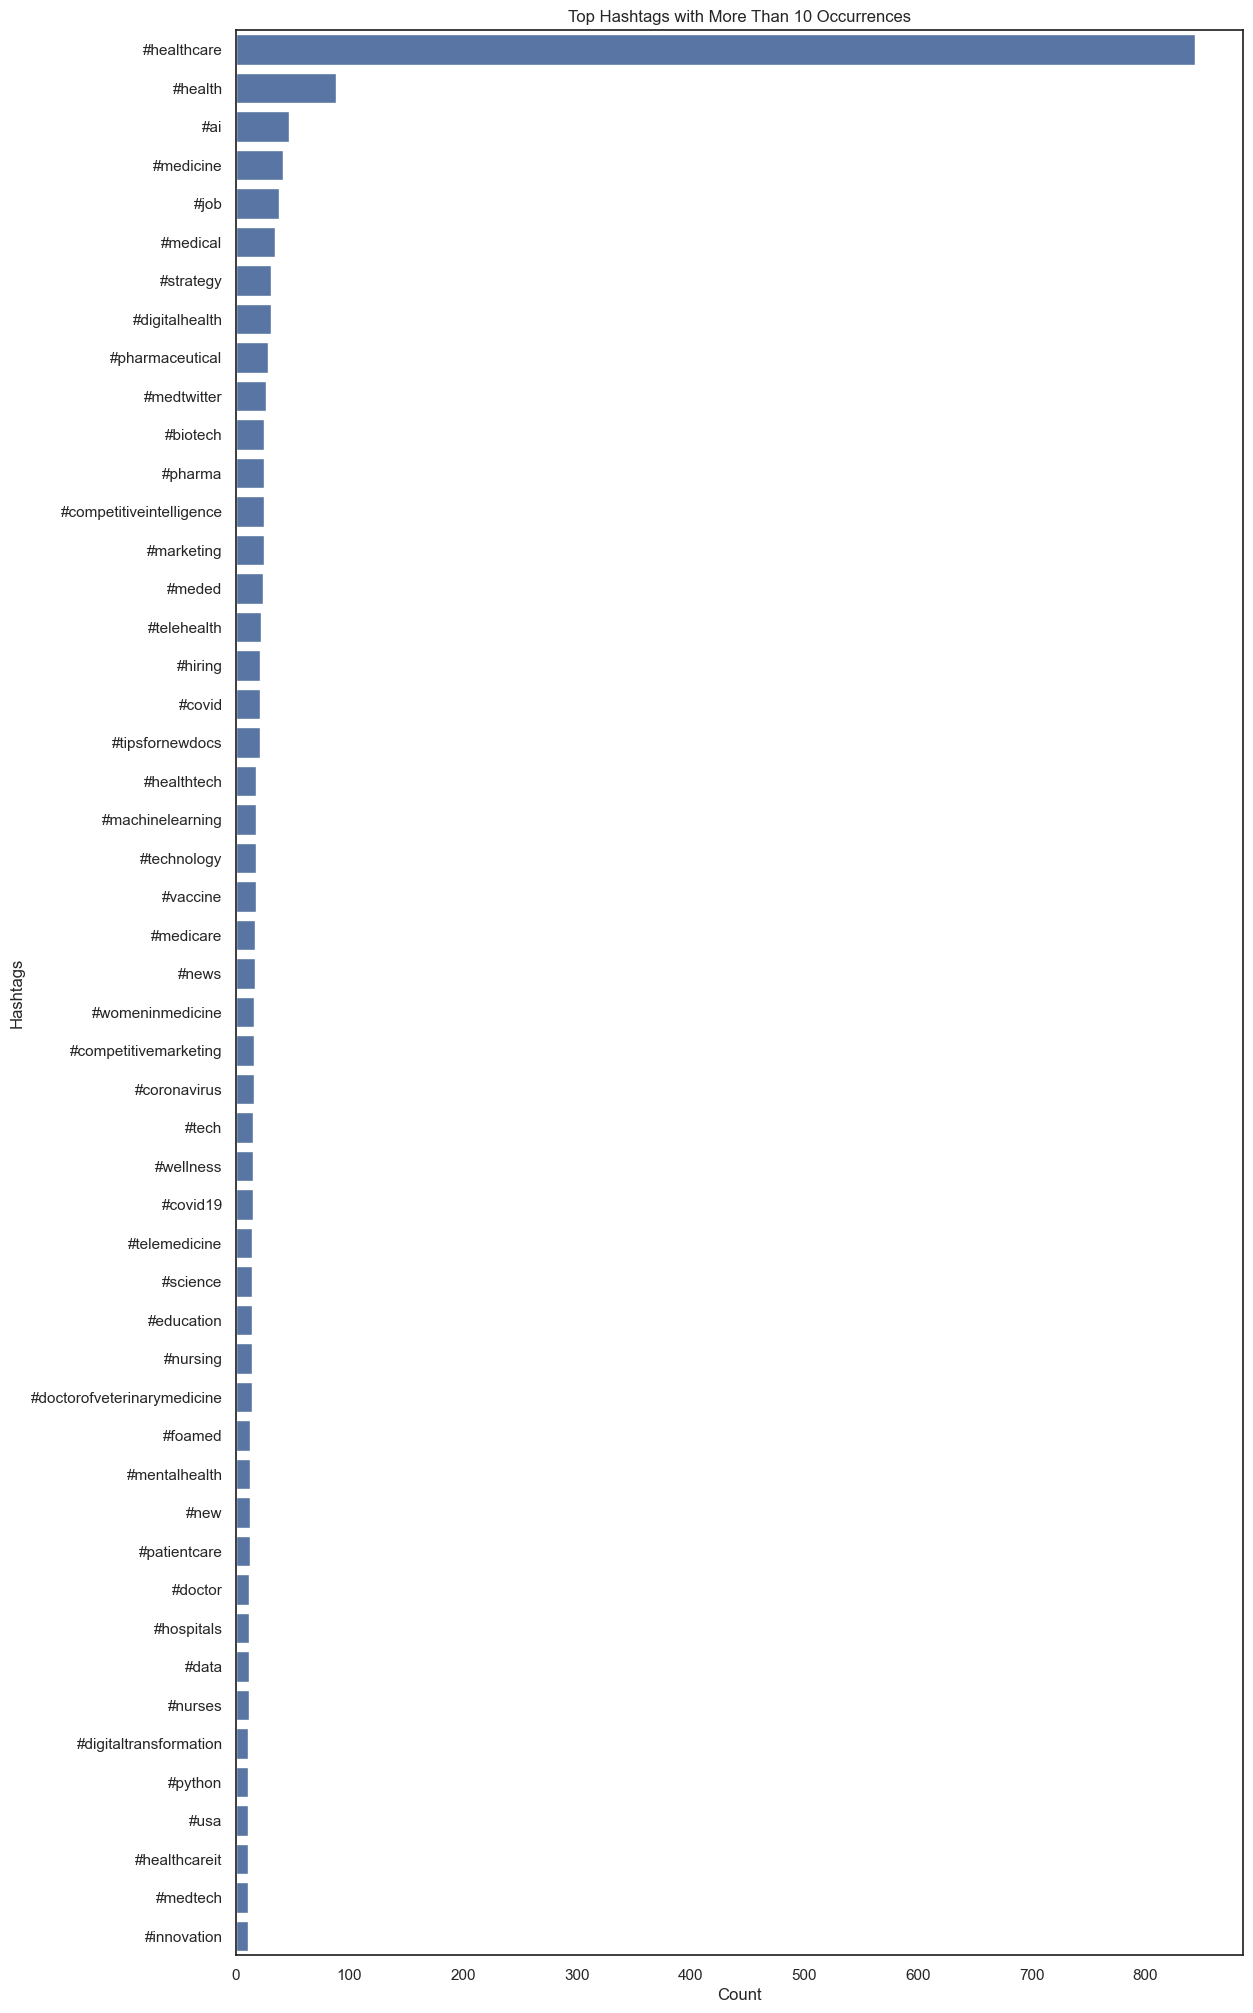

In [41]:
# Create a Seaborn barplot indicating records with a count >10 records.
plt.figure(figsize=(13, 25))  # Corrected figure size definition
sns.barplot(x='count', y='word', data=tags_df_filtered)
plt.title('Top Hashtags with More Than 10 Occurrences')
plt.xlabel('Count')
plt.ylabel('Hashtags')
plt.savefig('top_hashtags_barplot.png', dpi=300, bbox_inches='tight')

plt.savefig('top_hashtags.png', dpi=300)
plt.show()

# 

### Recommendations to the NHS. 

In [42]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
print(ar.head())

  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971  


In [43]:
# Print the min and max dates.
print(ar['appointment_month'].min(), ar['appointment_month'].max())

2020-01 2022-06


In [44]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_filtered = ar[ar['appointment_month'] >= '2021-08']
print(ar_filtered.head())

     icb_ons_code appointment_month appointment_status hcp_type  \
3652    E54000034           2021-08           Attended       GP   
3653    E54000034           2021-08           Attended       GP   
3654    E54000034           2021-08           Attended       GP   
3655    E54000034           2021-08           Attended       GP   
3656    E54000034           2021-08           Attended       GP   

     appointment_mode time_between_book_and_appointment  count_of_appointments  
3652     Face-to-Face                             1 Day                   6553  
3653     Face-to-Face                    15  to 21 Days                   2390  
3654     Face-to-Face                       2 to 7 Days                  10547  
3655     Face-to-Face                    22  to 28 Days                    937  
3656     Face-to-Face                     8  to 14 Days                   4961  


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [45]:
# Create an aggregated data set to review the different features.
ar_agg = ar_filtered[['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment', 'count_of_appointments']]
ar_agg = ar_agg.groupby(['appointment_month', 'hcp_type']).sum().reset_index()

# View the new DataFrame
print(ar_agg.head())

  appointment_month              hcp_type  \
0           2021-08                    GP   
1           2021-08  Other Practice staff   
2           2021-08               Unknown   
3           2021-09                    GP   
4           2021-09  Other Practice staff   

                                                                                                                                                                                        appointment_status  \
0  AttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAtte...   
1  AttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedAtte...   
2  AttendedAttendedAttendedAttendedAttendedAttendedAttendedAttendedDNAUnknownUnknownUnknownUnknownUnknownUnknow

In [46]:
# Determine the total number of appointments per month.
ar_df = ar_filtered.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['utilisation'] = (ar_df['count_of_appointments'] / 30) / 1200000 * 100  # % utilisation
ar_df['utilisation'] = ar_df['utilisation'].round(1)

# View the DataFrame.
print(ar_df.head())

  appointment_month  count_of_appointments  utilisation
0           2021-08               23852171         66.3
1           2021-09               28522501         79.2
2           2021-10               30303834         84.2
3           2021-11               30405070         84.5
4           2021-12               25140776         69.8


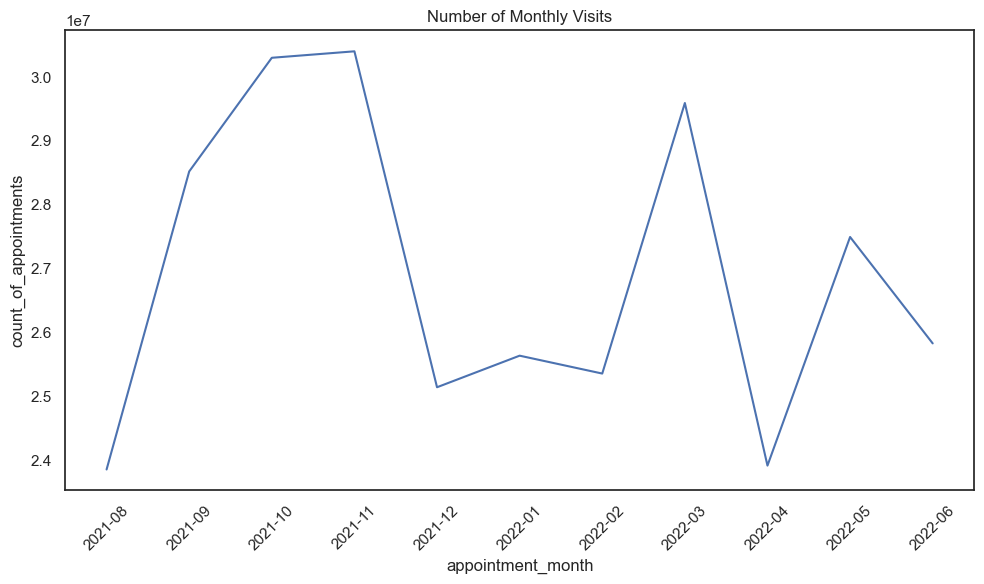

In [47]:
# Change the datatype of appointment_month to string
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)

# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_df)
plt.title('Number of Monthly Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_visits.png', dpi=300)
plt.show()

# Create a lineplot with Seaborn.

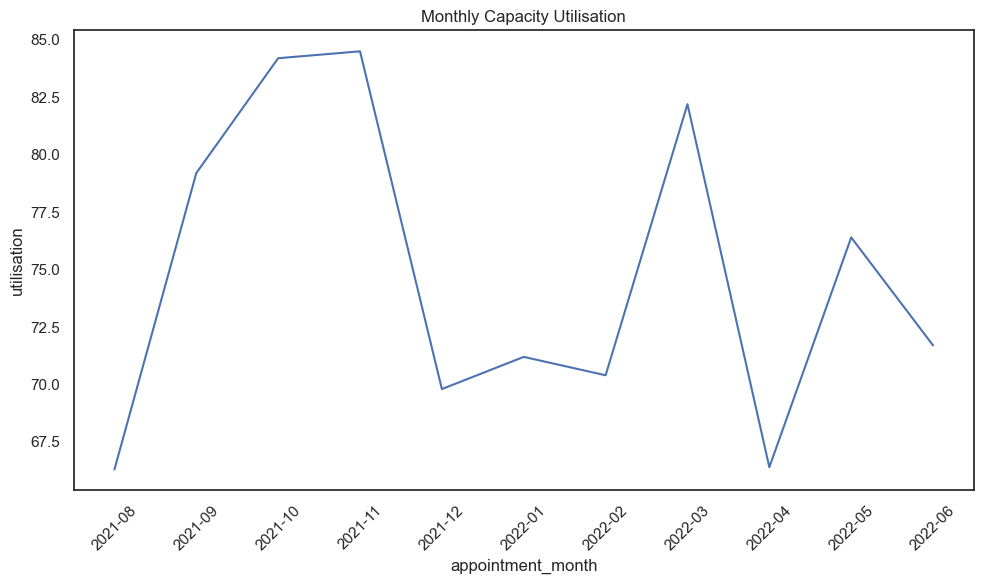

In [48]:
# Plot monthly capacity utilisation.
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='utilisation', data=ar_df)
plt.title('Monthly Capacity Utilisation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_capacity_utilisation.png', dpi=300)
plt.show()

# Create a lineplot.

**Question 2:** How do the healthcare professional types differ over time?

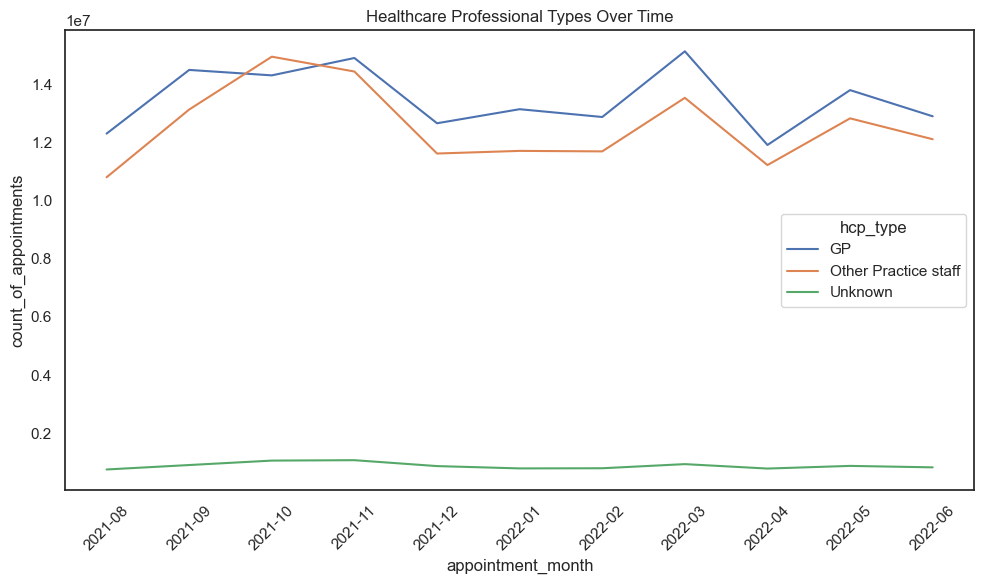

In [49]:
# Create a line plot to answer the question.
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=ar_agg)
plt.title('Healthcare Professional Types Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('hcp_types_over_time.png', dpi=300)
plt.show()

**Question 3:** Are there significant changes in whether or not visits are attended?

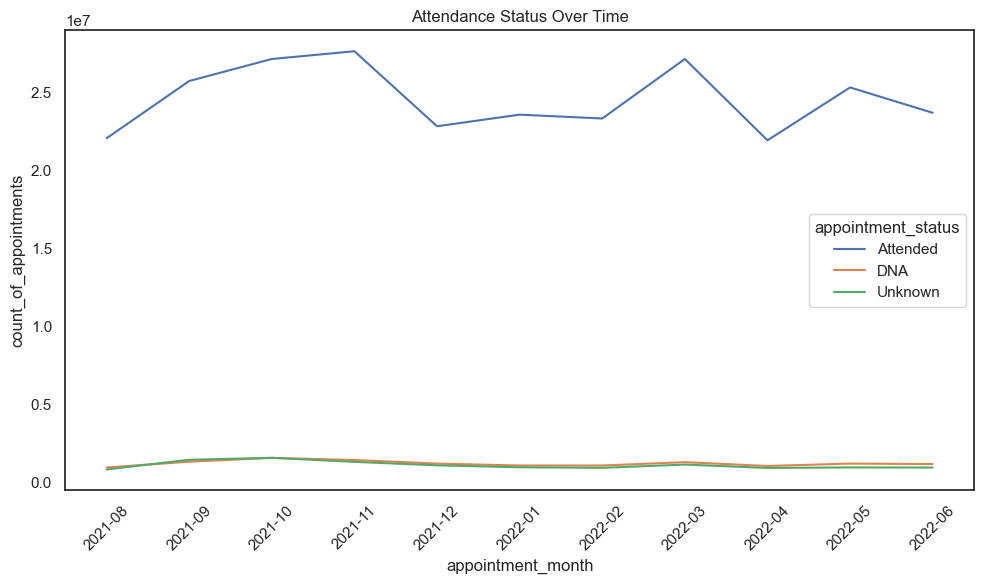

In [50]:
ar_status = ar_filtered.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()

# Create a line plot to answer the question.
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_status', data=ar_status)
plt.title('Attendance Status Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('attendance_status.png', dpi=300)
plt.show()

**Question 4:** Are there changes in terms of appointment type and the busiest months?

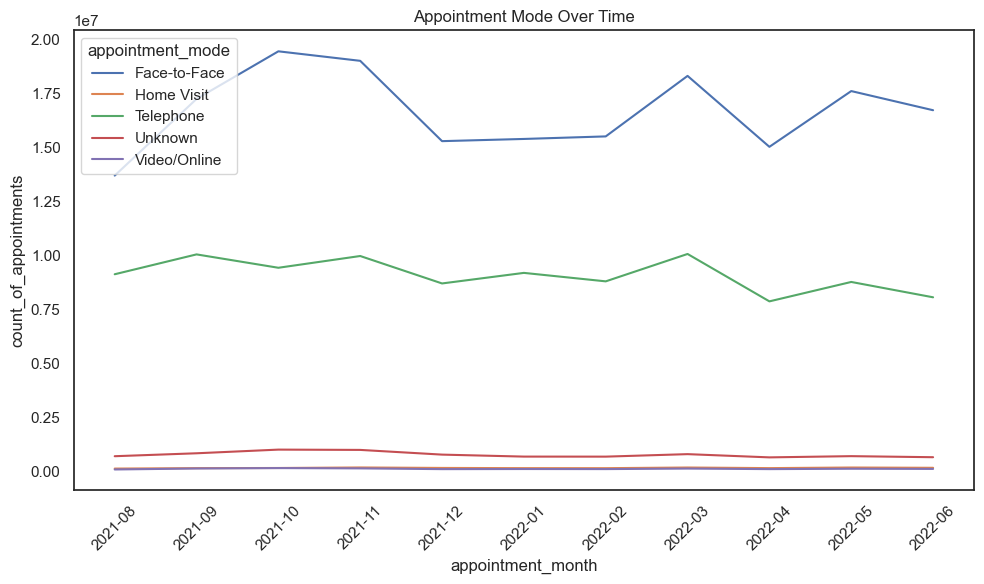

In [51]:
ar_mode = ar_filtered.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Create a line plot to answer the question.
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', data=ar_mode)
plt.title('Appointment Mode Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('appointment_mode.png', dpi=300)
plt.show()

**Question 5:** Are there any trends in time between booking and appointment?

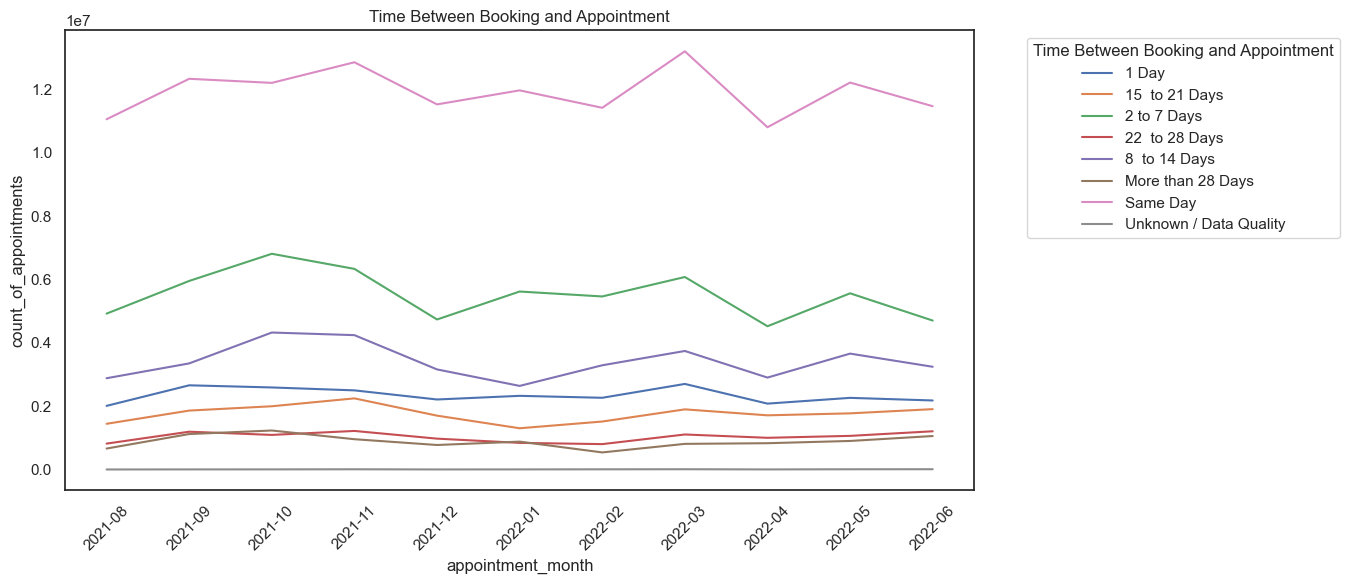

In [52]:
ar_time = ar_filtered.groupby(['appointment_month', 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# Create a line plot to answer the question.
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', data=ar_time)
plt.title('Time Between Booking and Appointment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Time Between Booking and Appointment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('time_between_booking_and_appointment.png', dpi=300)
plt.show()

**Question 6:** How do the various service settings compare?

In [54]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
ar_filtered = ar[ar['appointment_month'] >= '2021-08']
service_df = ar_filtered.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()

# View the DataFrame.
print(service_df.head())

  appointment_month              hcp_type  count_of_appointments
0           2021-08                    GP               12299022
1           2021-08  Other Practice staff               10797821
2           2021-08               Unknown                 755328
3           2021-09                    GP               14487785
4           2021-09  Other Practice staff               13126731


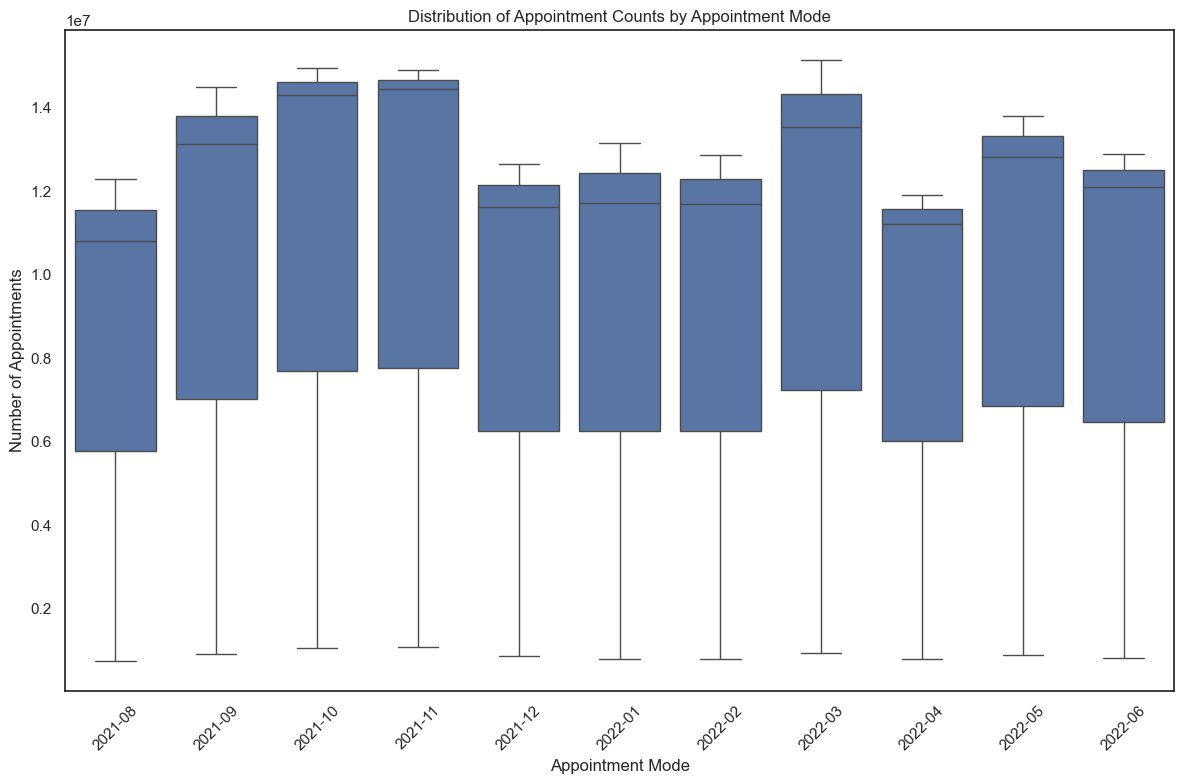

In [55]:
# Create a boxplot in Seaborn based on the new DataFrame to indicate the service settings for the number of appointments.
plt.figure(figsize=(12, 8))
sns.boxplot(x='appointment_month', y='count_of_appointments', data=service_df)
plt.title('Distribution of Appointment Counts by Appointment Mode')
plt.xlabel('Appointment Mode')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('appointment_counts_by_appointment_mode_boxplot.png', dpi=300)
plt.show()

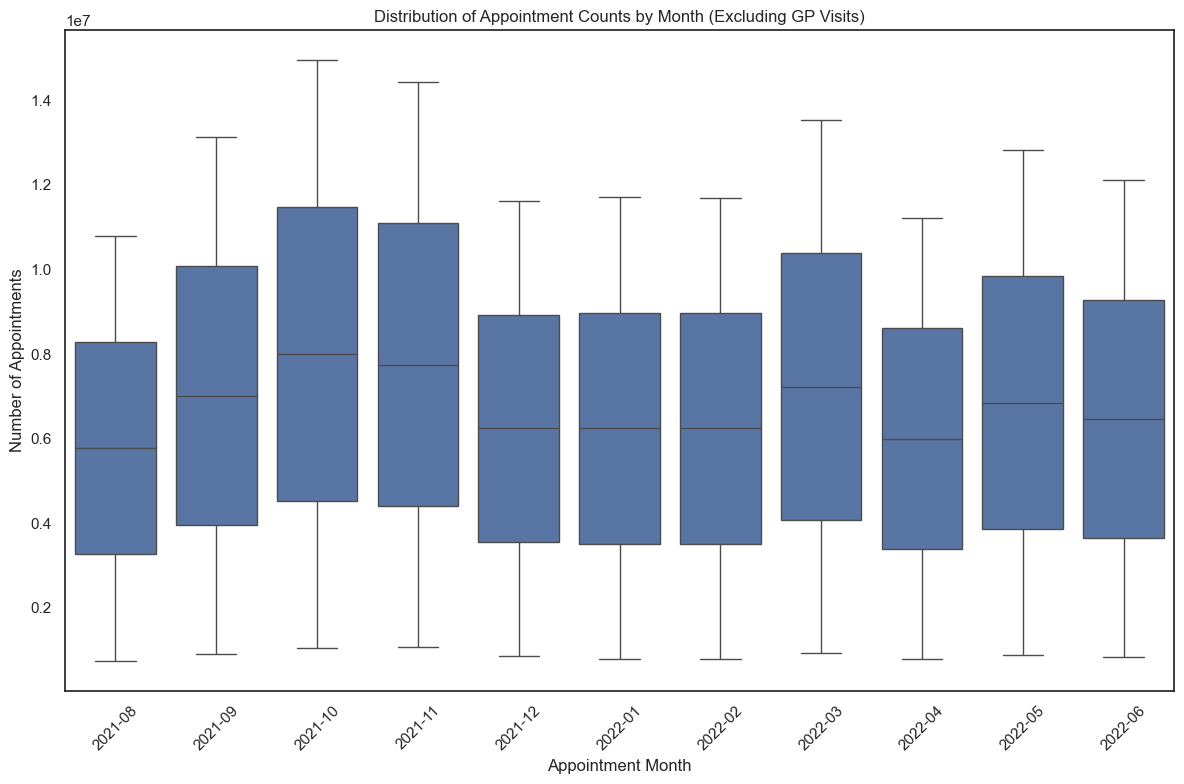

In [56]:
# Create a boxplot in Seaborn where you concentrate on all the service settings, excluding GP visits.
non_gp_df = service_df[service_df['hcp_type'] != 'GP']

# Create the boxplot for non-GP visits by month
plt.figure(figsize=(12, 8))
sns.boxplot(x='appointment_month', y='count_of_appointments', data=non_gp_df)
plt.title('Distribution of Appointment Counts by Month (Excluding GP Visits)')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('non_gp_appointment_counts_by_month_boxplot.png', dpi=300)
plt.show()

# 